In [ ]:
#| default_exp training.core

# Core

> Utilities function to train models & others

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#|export
from __future__ import annotations
import numpy as np
import pandas as pd
import pickle
import glob
from pathlib import Path

from fastcore.test import *

In [ ]:
# |export
def is_plateau(array:np.ndarray, # 1D array to test
               w_size:int=3, # Last elements to consider
               delta:float=0.01, # Threshold indicating plateau  
               verbose:bool=True # Display last `w_size` array's elements
              ):
    '''Detect if a plateau is reached when array diffs between last `w_size` below delta'''  
    if len(array) < w_size:
        return False
    pairs_diff = np.convolve(array, [-1, 1], mode='valid')
    is_all_below = np.all(pairs_diff[-w_size:] < delta)
    if verbose:
        print(f'Last pairs diff: {pairs_diff[-w_size:]}')
    return True if is_all_below else False

In [ ]:
# |hide
# Deprecated
def _is_plateau(array:np.ndarray, # 1D array to test
               w_size:int=3, # Moving average window size
               delta:float=0.01, # Threshold indicating plateau  
               verbose:bool=True # Display mean's evolution
              ):
    '''Detect if a plateau is reached'''  
    if len(array) < w_size:
        return False
    prev_mean = np.mean(array[-(w_size+1):-1])
    new_mean = np.mean(array[-w_size:])
    if verbose:
        print(f'Previous mean: {prev_mean:.3f}')
        print(f'New mean: {new_mean:.3f}')
        print(f'Is means difference: {prev_mean - new_mean:.3f} < {delta:.3f}')
    return True if (prev_mean - new_mean) < delta else False

For instance:

Array (loss): [2.3 2.  1.  0.5]
Last pairs diff: [0.3 1.  0.5]
Has reached a plateau? False


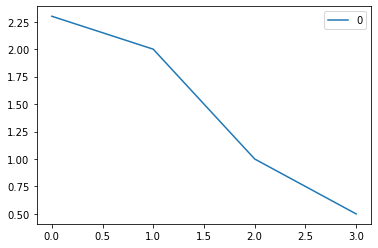

In [ ]:
loss = np.array([2.3, 2, 1, 0.5])
print(f'Array (loss): {loss}')
print(f'Has reached a plateau? {is_plateau(loss, delta=0.01)}')
pd.DataFrame(loss).plot();

Array (loss): [2.3 2.  1.  0.5 0.4]
Last pairs diff: [1.  0.5 0.1]
Has reached a plateau? False


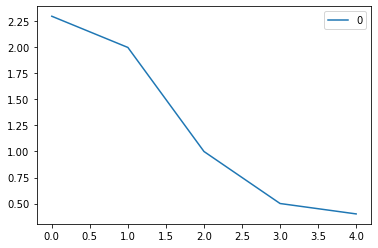

In [ ]:
loss = np.array([2.3, 2, 1, 0.5, 0.4])
print(f'Array (loss): {loss}')
print(f'Has reached a plateau? {is_plateau(loss, delta=0.01)}')
pd.DataFrame(loss).plot();

Array (loss): [2.3  2.   1.   0.5  0.4  0.38 0.37]
Last pairs diff: [0.1  0.02 0.01]
Has reached a plateau? False


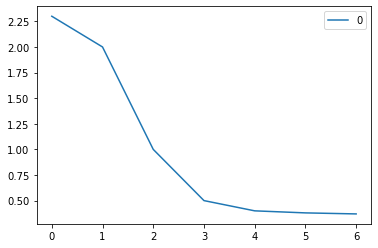

In [ ]:
loss = np.array([2.3, 2, 1, 0.5, 0.4, 0.38, 0.37])
print(f'Array (loss): {loss}')
print(f'Has reached a plateau? {is_plateau(loss, delta=0.015)}')
pd.DataFrame(loss).plot();

Array (loss): [2.3   2.    1.    0.5   0.4   0.38  0.37  0.369 0.369]
Last pairs diff: [0.01  0.001 0.   ]
Has reached a plateau? True


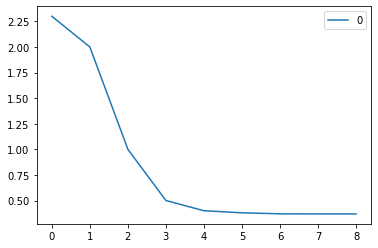

In [ ]:
loss = np.array([2.3, 2, 1, 0.5, 0.4, 0.38, 0.37, 0.369, 0.369])
print(f'Array (loss): {loss}')
print(f'Has reached a plateau? {is_plateau(loss, delta=0.015)}')
pd.DataFrame(loss).plot();

In [ ]:
# |export
def load_dumps(src_dir):
    """Load all `.pickle` file in specified directory"""
    dumps = []
    for file in glob.glob(str(src_dir/'*.pickle')):
        with open(file, 'rb') as f: 
            dumps.append(pickle.load(f))
    return dumps

In [ ]:
dumps = load_dumps(Path('test/lc'))

In [ ]:
test_eq(len(dumps), 2)